CSC6621 Spring 2023
Dr. Berisha
Mini Lab #3
Amini, Arsalon

In [7]:
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm

In [8]:
# Download a list of files
def download_files(url_list):
    file_paths = []
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))
            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
        file_paths.append(path)
    print('All dataset files downloaded!')
    return file_paths


In [9]:
# Load and plot data from the .npz format
def load_and_plot_data(file_paths):
    # Load data
    data = np.load(file_paths[0])
    images = data['arr_0']
    labels = np.load(file_paths[1])['arr_0']

    # Plot examples from 4 different classes
    classes_to_plot = 4
    examples_per_class = 3
    fig, axes = plt.subplots(nrows=classes_to_plot, ncols=examples_per_class, figsize=(10, 10))
    for i in range(classes_to_plot):
        class_images = images[labels == i]
        for j in range(examples_per_class):
            axes[i, j].imshow(class_images[j], cmap='gray')
            axes[i, j].axis('off')
    plt.show()

    return images, labels

In [10]:
# Reshape and normalize images
def preprocess_images(images):
    images = images.reshape(-1, 28, 28, 1).astype('float32') / 255
    return images

100%|██████████| 17954/17954 [00:21<00:00, 831.73KB/s] 


100%|██████████| 30/30 [00:00<00:00, 305.11KB/s]


100%|██████████| 3008/3008 [00:03<00:00, 874.96KB/s]


100%|██████████| 6/6 [00:00<00:00, 16246.50KB/s]


All dataset files downloaded!


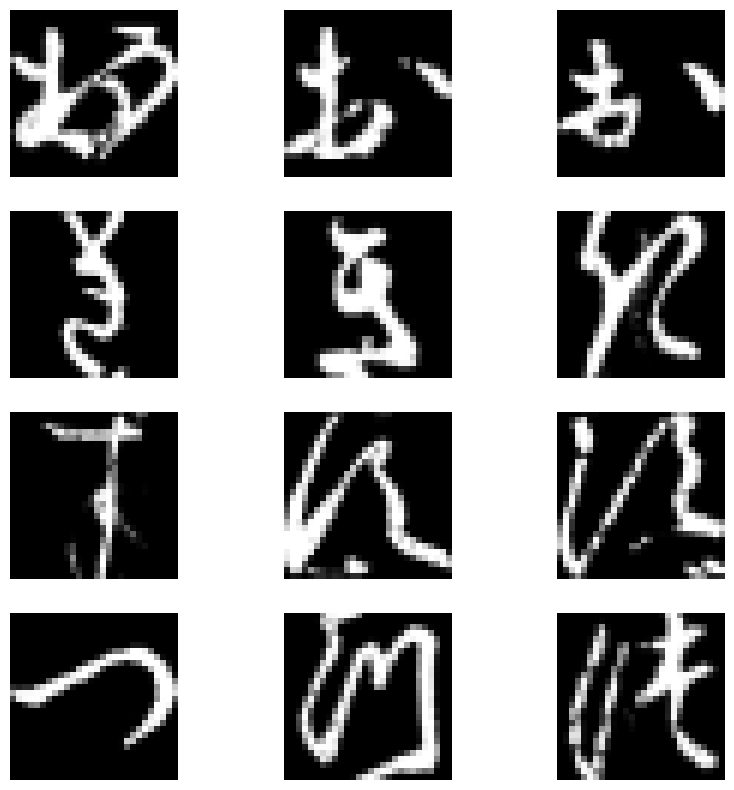

Images are reshaped and normalized.


In [11]:
selected_urls = [
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'
    ]

# Download files
file_paths = download_files(selected_urls)

# Load, plot and preprocess the data
images, labels = load_and_plot_data(file_paths)
images = preprocess_images(images)
print("Images are reshaped and normalized.")